

## **Module 1: BASIC OPEN CV AND  MATHEMATICAL OPERATION**



In [8]:
import cv2 #importing library 

**READING IMAGE FROM A FILE**

In [18]:
img1 = cv2.imread("/content/image1.jpg" , 1) #where inside bracket we have provided path and operation to open the image
#Use 0:  grayscale image
#    1:  coloured image(Default)
#   -1:  original image

**DISPLAYING THE IMAGE**

[[[ 80  84 109]
  [ 79  83 108]
  [ 80  83 111]
  ...
  [ 71  58  50]
  [ 71  58  50]
  [ 72  59  51]]

 [[ 82  86 111]
  [ 82  86 111]
  [ 82  85 113]
  ...
  [ 71  58  50]
  [ 72  59  51]
  [ 72  59  51]]

 [[ 84  88 113]
  [ 84  88 113]
  [ 85  88 116]
  ...
  [ 72  59  51]
  [ 72  59  51]
  [ 73  60  52]]

 ...

 [[  0  57  33]
  [  6  58  28]
  [  6  47  15]
  ...
  [  7  73  62]
  [  0  55  45]
  [  0  56  47]]

 [[  6  68  44]
  [  0  49  19]
  [  3  41  11]
  ...
  [  0  55  44]
  [  8  65  56]
  [  6  53  45]]

 [[  3  68  42]
  [  0  38   8]
  [  3  38  11]
  ...
  [  0  60  49]
  [ 18  71  62]
  [  0  34  27]]]


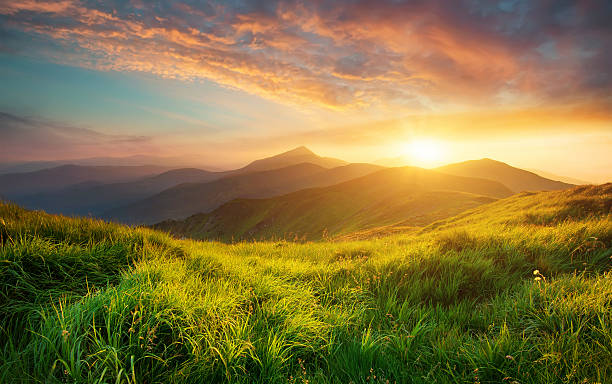

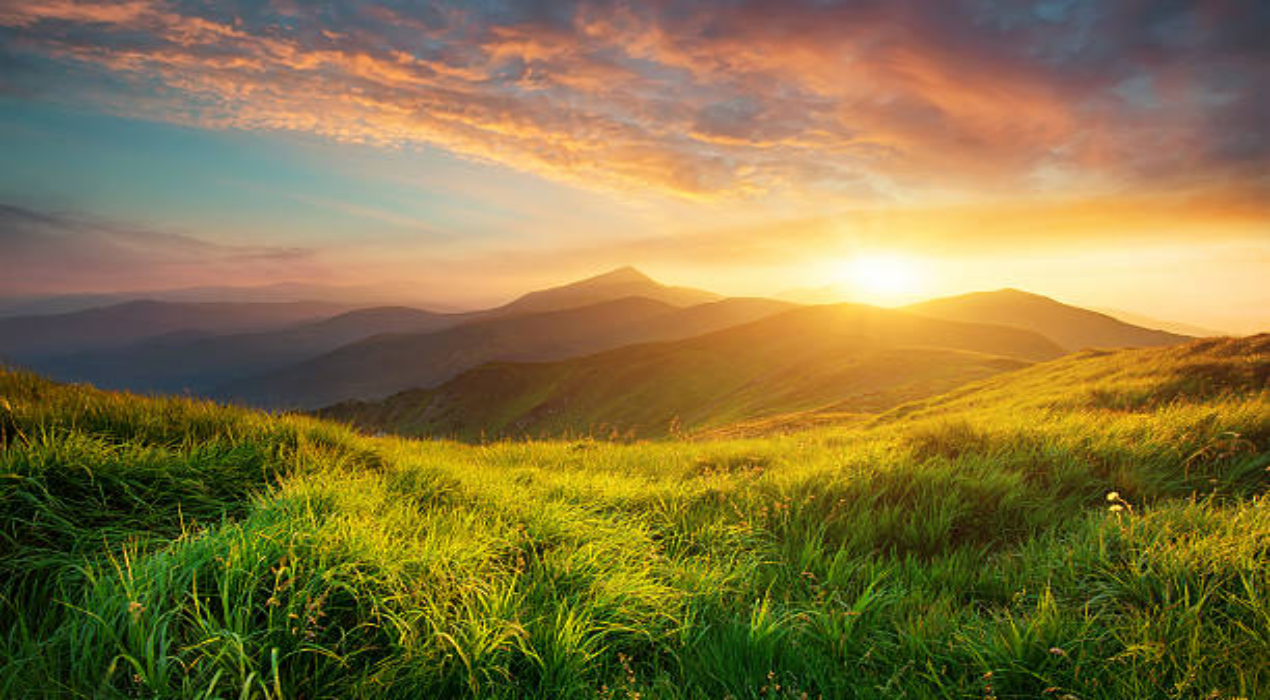

In [19]:
print(img1) #Displays the image in array format BGR
#Here image is read as an array for pixel ,While we use the command print,what we get is an array.

from google.colab.patches import cv2_imshow #In google colab use this command to display an image since cv2.imshow() could cause an error

cv2_imshow( img1) #Display image in a window

img2 = cv2.resize(img1, (1270,700))#(width,height)  #Changing size of the image displayed

cv2_imshow( img2)


# **SAVING AN IMAGE**
Here we have shown how can you save the converted image in your own device.Since we can manipulate image in many ways,this can be helpful to store those converted image in your device.

In [ ]:
cv2.imwrite('D:\codes\E CLUB\Tutorial1\resize.jpg',img2) #Give the path where you want to copy the image

True

In [ ]:
resized=cv2.imread("D:\codes\E CLUB\Tutorial1\resize.jpg",1) #check whether the image is present in the same location as given by reading it by giving the same path.
#and display it using cv2_imshow
cv2_imshow(resized)

# **Input Image From Webcam**
 Basically we used standard code by importing the necessary library to access our device camera and stored the captured image in the final output of the function created.The file is then read and displayed in similiar manner as it was shown in the module previously.

In [ ]:
# This is Standard code which you can get from your google colab command palette itself ,also it's reference link will be provided 
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


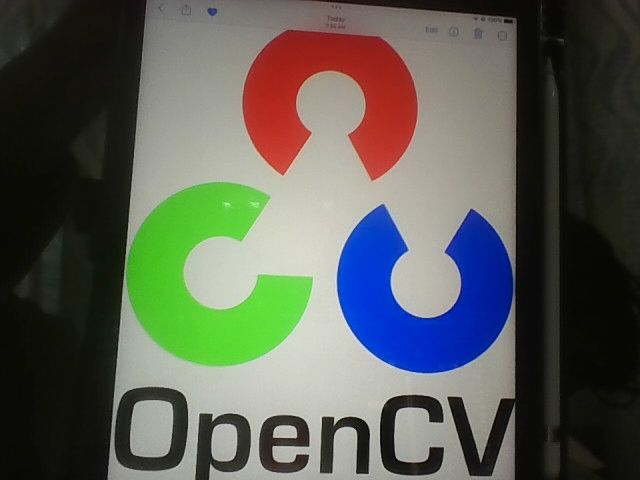

In [ ]:
 captured=cv2.imread(filename,1) #Read and display the image which was captured from my webcam
 cv2_imshow(captured)

#  Various Others Operation image

Arithmetic operations

In [31]:
img1 = cv2.imread("/content/img1.jpg", 1) #Two input images on which we will perform few operations
img2 = cv2.imread("/content/img2.jpg", 1)

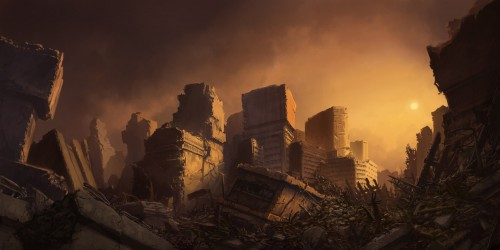

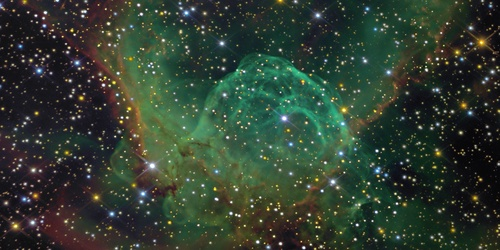

In [32]:
cv2_imshow( img1)
cv2_imshow( img2)

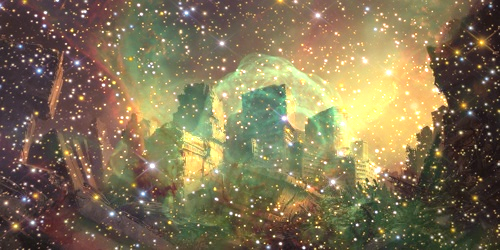

In [33]:
img = cv2.add(img1,img2)
cv2_imshow( img) #both the images need to be of same dimension to carry out addition/superposition operation

#  IMAGE BLENDING
This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency. Images are added as per the equation below:

g(x)=(1−α)f0(x)+αf1(x)
By varying α from 0→1, you can perform a cool transition between one image to another.


In [34]:
#weighted addition of image
img = cv2.addWeighted(img1,0.5,img2,0.4,10)
cv2_imshow( img)   ## here you can decide for yourself,the amount of superposition you want for each image

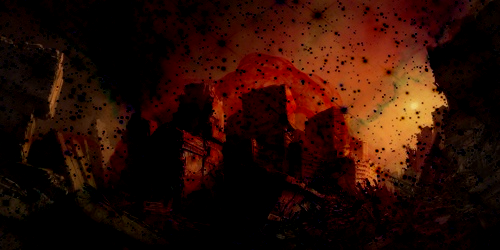

In [35]:
#substraction of images
img = cv2.subtract(img1,img2)
cv2_imshow( img)

# Bitwise Operation on the Image
This includes the bitwise AND, OR, NOT, and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI's, and etc. Below we will see an example of how to change a particular region of an image.



In [46]:
IMG1=cv2.imread('/content/IMG1.jpeg',1)
IMG2=cv2.imread('/content/IMG2.jpeg',1)
cv2_imshow(IMG1) #input image 1


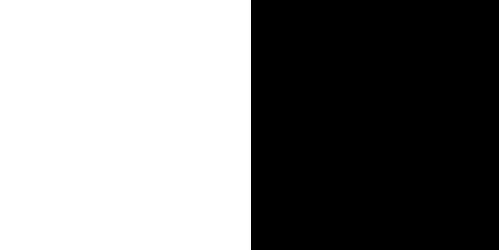

In [47]:
cv2_imshow(IMG2) #input image 2

Various Bitwise Arithmetic operation on these two input images

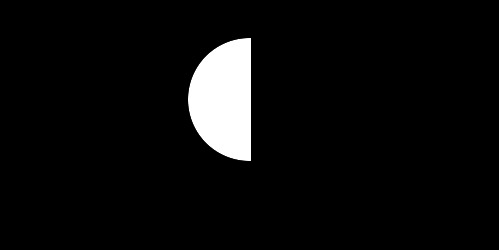

In [22]:
img = cv2.bitwise_and(IMG1,IMG2,mask=None)
cv2_imshow(img)

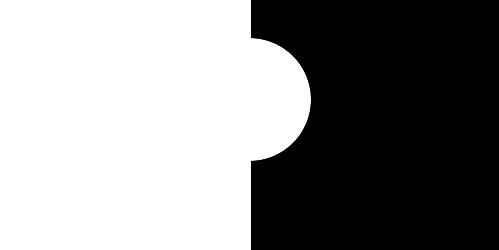

In [24]:
img = cv2.bitwise_or(IMG1,IMG2,mask=None)
cv2_imshow(img)

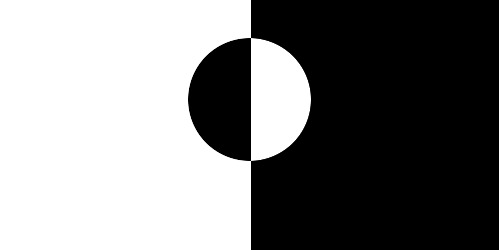

In [26]:
img = cv2.bitwise_xor(IMG1,IMG2,mask=None)
cv2_imshow(img)

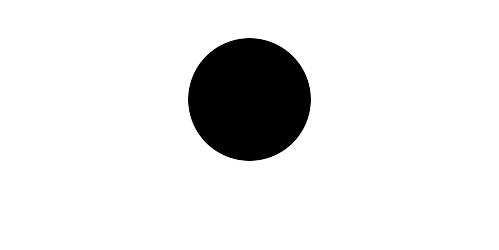

In [27]:
img = cv2.bitwise_not(IMG1,mask=None)
cv2_imshow(img)

<hr>RESIZING OF IMAGE<br>
The resize() method is used to change the size of the image. It recieves the image and its dimensions(in a tupple) as arguments.


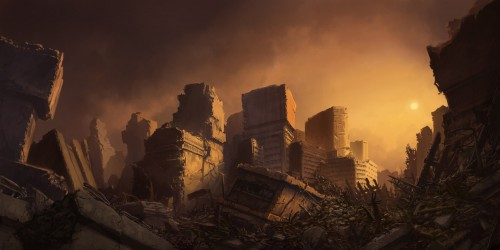

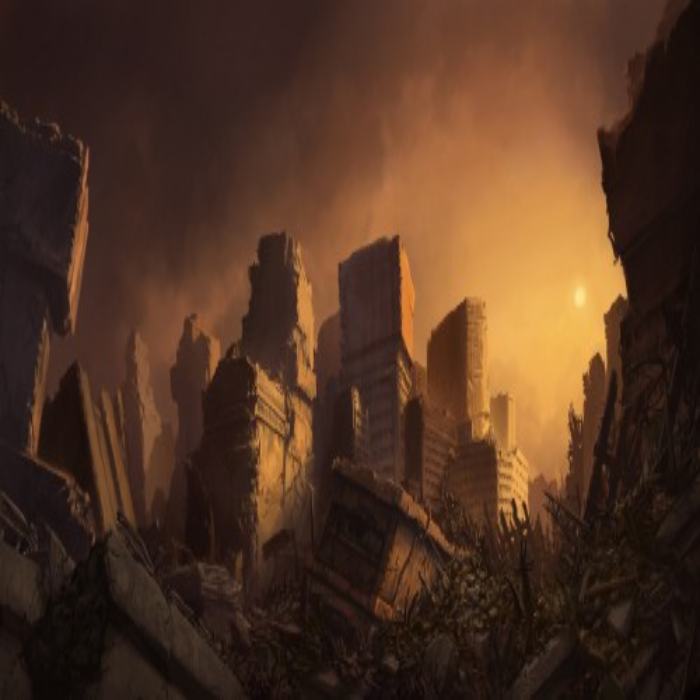

In [36]:
cv2_imshow(img1)
img = cv2.resize(img1, (700,700)) 
cv2_imshow( img)

<hr>CONVERTING IMAGE TO VARIOUS DIFFERENT FORM<br>
To convert images , we use cvtcolor() function

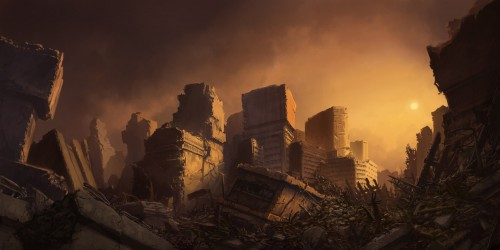

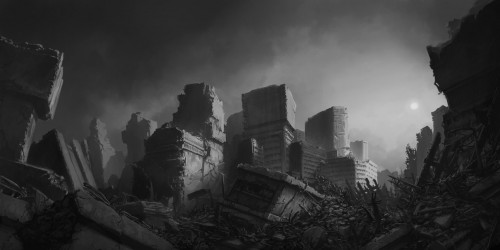

In [37]:
cv2_imshow(img1)
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
cv2_imshow(img)

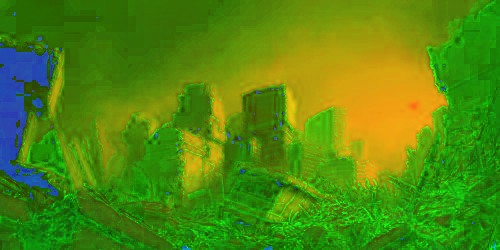

In [48]:
img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV) 
cv2_imshow(img)

RGB-BGR OPERATIONS


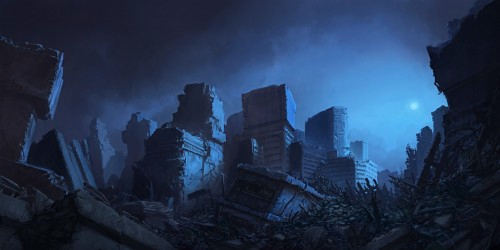

In [38]:
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

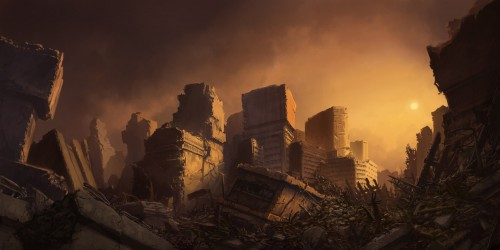

In [39]:
# Splitting the image into different color channels 
b,g,r=cv2.split(img1)
cv2_imshow(img1)
cv2_imshow(r)
cv2_imshow(g)
cv2_imshow(b)


In [40]:
import numpy as np

In [41]:
stack = np.hstack((r,g,b)) #To view the image side by side
cv2_imshow(stack)

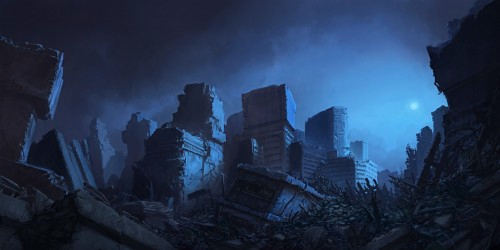

In [42]:
COMBINED = (np.dstack((r,g,b))).astype(np.uint8)  ##You can combine any 3 array to get an image 
cv2_imshow(COMBINED) 

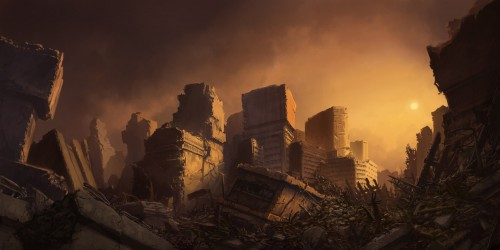

In [43]:
COMBINED = (np.dstack((b,g,r))).astype(np.uint8)  ##You can combine any 3 array to get an image 
cv2_imshow(COMBINED) 

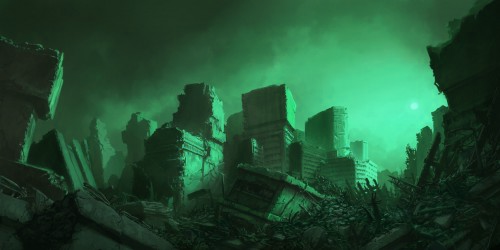

In [44]:
COMBINED = (np.dstack((g,r,b))).astype(np.uint8)  ##You can combine any 3 array to get an image 
cv2_imshow(COMBINED) 

# ROTATION ,TRANSLATION AND SCALING 

Rotation
You can rotate an image by a certain angle \theta by defining a transformation matrix M. This matrix is usually of the form:

(1) \begin{equation*} M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix} \end{equation*}
OpenCV provides the ability to define the center of rotation for the image and a scale factor to resize the image as well. In that case, the transformation matrix gets modified.

(2) \begin{equation*} \begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot c_x - \beta \cdot c_y \\ - \beta & \alpha & \beta \cdot c_x + (1- \alpha ) \cdot c_y \end{bmatrix} \end{equation*}
In the above matrix:

(3) \begin{equation*} \begin{array}{l} \alpha = scale \cdot \cos \theta  \\ \beta = scale \cdot \sin \theta \end{array} \end{equation*}
where c_x & c_y are the coordinates along which the image is rotated.

OpenCV provides the getRotationMatrix2D() function to create the above transformation matrix.

The getRotationMatrix2D() function takes the following arguments:

center: the center of rotation for the input image

angle: the angle of rotation in degrees

scale: an isotropic scale factor which scales the image up or down according to the value provided

If the angle is positive, the image gets rotated in the counter-clockwise direction. If you want to rotate the image clockwise by the same amount, then the angle needs to be negative.

Rotation is a three-step operation:

First, you need to get the center of rotation. This typically is the center of the image you are trying to rotate.

Next, create the 2D-rotation matrix. OpenCV provides the getRotationMatrix2D() function that we discussed above. 

Finally, apply the affine transformation to the image, using the rotation matrix you created in the previous step. The warpAffine() function in OpenCV does the job.

In [ ]:
# Dividing height and width by 2 to get the center of the image
height, width = img1.shape[:2]
center = (width/2, height/2)

In [ ]:

# the above center is the center of rotation axis
# use cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=25, scale=1)

In [ ]:

# Rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img1, M=rotate_matrix, dsize=(width, height))

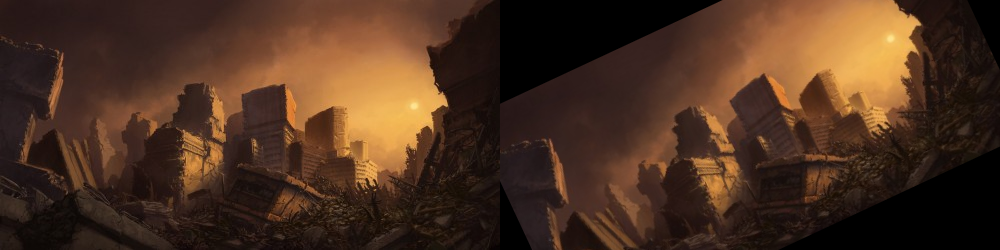

In [ ]:
rotated_image=np.hstack((img1,rotated_image))
cv2_imshow(rotated_image)

# TRANSLATION
In computer vision, translation of an image means shifting it by a specified number of pixels, along the x and y axes. Let the pixels by which the image needs to shifted be tx and ty. Then you can define a translation matrix M:

(4) \begin{equation*} M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} \end{equation*}
Now, there are a few points you should keep in mind while shifting the image by tx and ty values.

Providing positive values for tx will shift the image to right and negative values will shift the image to the left.
Similarly, positive values of ty will shift the image down while negative values will shift the image up.

In [ ]:
# get tx and ty values for translation
# you can specify any value of your choice
tx, ty = width / 4, height / 4
 
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

In [ ]:
	
# apply the translation to the image
translated_image = cv2.warpAffine(src=img1, M=translation_matrix, dsize=(width, height))


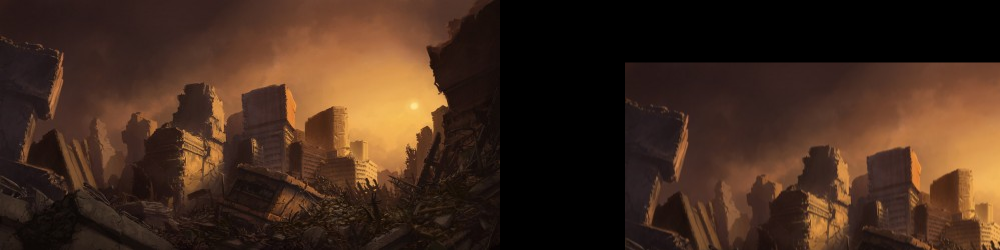

In [ ]:
translated_image=np.hstack((img1,translated_image))
cv2_imshow(translated_image)

# EXTRA:- VIDEO INPUT
In this portion we will introduce you to some code snippet which can help you access the video capturing as well as displaying it.
Though some part of it may seem overwhleming ,you can always ask us about in detail in our discord server.

Video capturing using webcam (this code snippet will work on your local python compiler) while it will you infinite runtime in google colab since this code will try access the server camera(which isn't present in real situation) rather than device input camera.

In [ ]:
# import cv2
# cap = cv2.VideoCapture(0)  
  
# while(True):  
#     # Capture image frame-by-frame  
#     ret, frame = cap.read()  

#     if ret == True:
#     # Our operations on the frame come here  
#       gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    
#       # Display the resulting frame  
#       cv2.imshow("frame", frame)

#       if cv2.waitKey(1) & 0xFF == ord('q'):  
#           break  
  
# # When everything done, release the capture  
# cap.release()  
# cv2.destroyAllWindows()

Code snippet through which we can access the device local input display device,The following code lets you take video inside of Google Colab. It uses Javascript inside of colab to access the client computer’s camera.

We will also share a video tutorial explaining it's details

In [ ]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def record_video(filename): #defining a function using JS to access your device camera and read the video using it
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      
      capture.textContent = "Start Recording";
      capture.style.background = "orange";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});
    
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      
      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):
  
  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:
video_path = "test.mp4"
record_video(video_path)


<IPython.core.display.Javascript object>

Finished recording video at:test.mp4


In [ ]:
show_video(video_path)